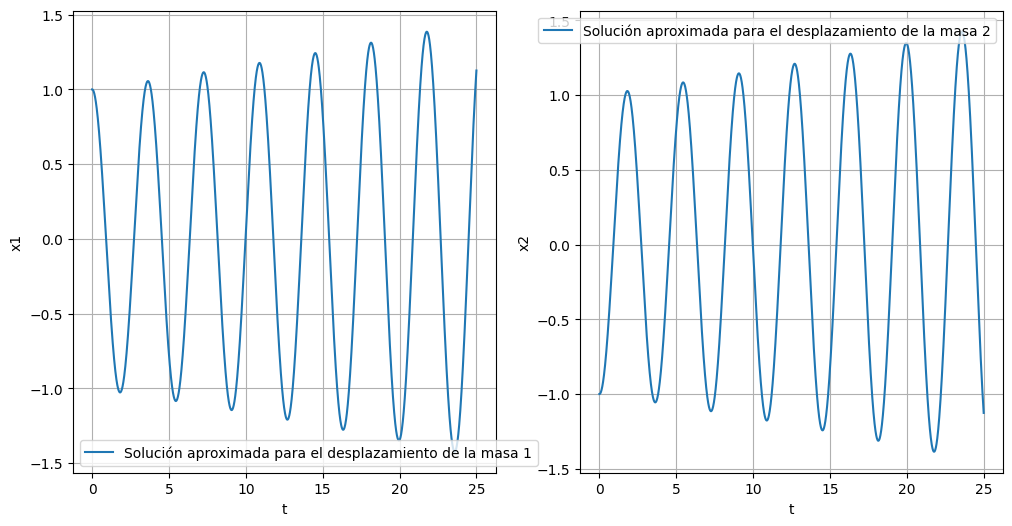

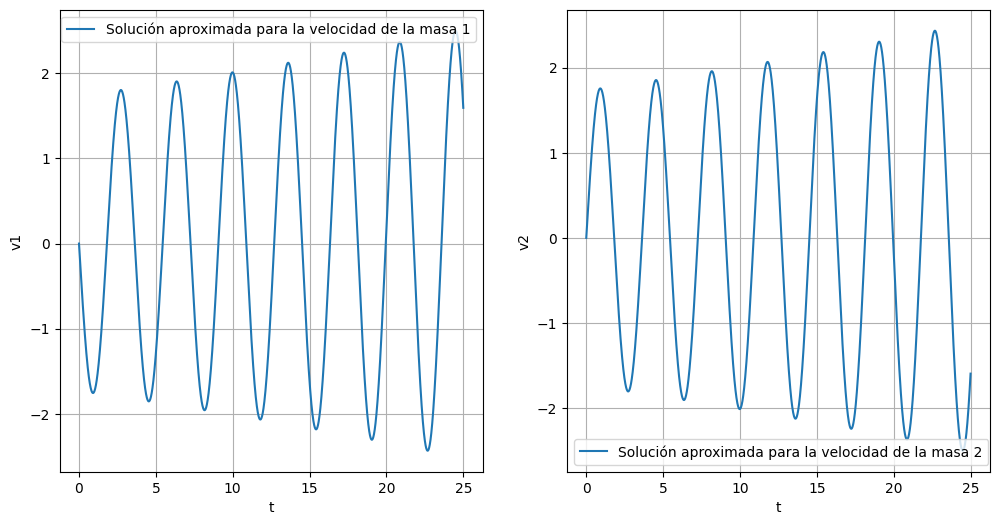

In [1]:
import numpy as np
import matplotlib.pyplot as plt

dx1 = lambda t, x1, v1 : v1
dv1 = lambda t, x1, x2, v1 : (-k/m1)*x1 + (kc/m1)*(x2-x1)
dx2 = lambda t, x2, v2 : v2
dv2 = lambda t, x1, x2, v2 : (-k/m2)*x2 - (kc/m2)*(x2-x1)

k = 2
kc = 0.5
m1 = 1
m2 = 1

v01 = 0
x01 = 1
x02 = -1
v02 = 0
t0 = 0
tf = 25
h = 0.01


def euler_explicito(dx1,dv1,dx2,dv2,t0,x01,x02,v01,v02,tf,h):
    N = int((tf-t0)/h)
    t_valores = np.linspace(t0,tf,N+1)
    x_valores1 = np.zeros(N+1)
    x_valores2 = np.zeros(N+1)
    x_valores1[0] = x01
    x_valores2[0] = x02
    v_valores1 = np.zeros(N+1)
    v_valores1[0] = v01
    v_valores2 = np.zeros(N+1)
    v_valores2[0] = v02
    for i in range(N):
        x_valores1[i+1] = x_valores1[i] + h*dx1(t_valores[i],x_valores1[i],v_valores1[i])
        x_valores2[i+1] = x_valores2[i] + h*dx2(t_valores[i],x_valores2[i],v_valores2[i])
        v_valores1[i+1] = v_valores1[i] + h*dv1(t_valores[i],x_valores1[i],x_valores2[i],v_valores1[i])
        v_valores2[i+1] = v_valores2[i] + h*dv2(t_valores[i],x_valores1[i],x_valores2[i],v_valores2[i])
    return t_valores, x_valores1, x_valores2, v_valores1, v_valores2 

t_v, x_v1, x_v2, v_v1, v_v2 = euler_explicito(dx1,dv1,dx2,dv2,t0,x01,x02,v01,v02,tf,h)
plt.figure(figsize = (12, 6))

plt.subplot(1, 2, 1)
plt.plot(t_v, x_v1, label = "Solución aproximada para el desplazamiento de la masa 1")    
plt.xlabel("t")
plt.ylabel("x1")
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(t_v, x_v2, label = "Solución aproximada para el desplazamiento de la masa 2")    
plt.xlabel("t")
plt.ylabel("x2")
plt.legend()
plt.grid()

plt.figure(figsize = (12, 6))

plt.subplot(1, 2, 1)
plt.plot(t_v, v_v1, label = "Solución aproximada para la velocidad de la masa 1")    
plt.xlabel("t")
plt.ylabel("v1")
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(t_v, v_v2, label = "Solución aproximada para la velocidad de la masa 2")    
plt.xlabel("t")
plt.ylabel("v2")
plt.legend()
plt.grid()